# Leitura do arquivo

In [61]:
# Global shark attack website: https://www.sharkattackfile.net/whystudy.htm
# Bench de projeto: https://github.com/Marcio-Marchiori/shark_attack
import seaborn
import xlrd
import pandas as pd
import re

file = open('attacks.csv', 'rb')
file_lines = file.readlines(10000)
for i in range(5):
    print(file_lines[i].decode('latin-1'))
file.close()

Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex ,Age,Injury,Fatal (Y/N),Time,Species ,Investigator or Source,pdf,href formula,href,Case Number,Case Number,original order,,

2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303,,

2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely ,F,11,Minor injury to left thigh,N,14h00  -15h00,,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,2018.06.18,2018.06.18,6302,,

201

In [2]:
tb_attacks = pd.read_csv('attacks.csv', sep = ',', encoding = 'latin-1')
tb_attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

# Limpeza do nome das colunas

In [3]:
print('Nomes antigos:',tb_attacks.columns)
pattern = '[ .:]+'
tb_attacks.columns = [re.sub(pattern,'_',element.lower().strip()) for element in tb_attacks.columns]
print('Nomes novos (limpos):',tb_attacks.columns)

Nomes antigos: Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
Nomes novos (limpos): Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')


In [4]:
tb_attacks

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpeza de dados

In [5]:
# A coluna de case_number possui o maior número de elementos não nulos
tb_attacks.info()
print("Total de elementos na coluna 'case_number':",len(tb_attacks['case_number']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [6]:
# drop de todos os valores na da coluna 'case number'
tb_attacks = tb_attacks.dropna(subset=['case_number'])

# drop de todos os valores nulos da coluna 'case number'
tb_attacks = tb_attacks[tb_attacks['case_number']!='0']
tb_attacks.info()

# drop de todos os valores na da coluna 'date'
tb_attacks = tb_attacks.dropna(subset=['date'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6302 non-null   object 
 1   date                    6301 non-null   object 
 2   year                    6299 non-null   float64
 3   type                    6297 non-null   object 
 4   country                 6251 non-null   object 
 5   area                    5846 non-null   object 
 6   location                5761 non-null   object 
 7   activity                5757 non-null   object 
 8   name                    6091 non-null   object 
 9   sex                     5736 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6273 non-null   object 
 12  fatal_(y/n)             5762 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null  

In [7]:
# completa coluna de 'year'
tb_attacks[tb_attacks['year'].isna()]

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN


In [8]:
tb_attacks.iloc[187,2] = 2017.0

In [9]:
# drop de todos os valores na da coluna 'year' que são mais antigos que 2010 (trabalhar com dados mais recentes)
tb_attacks = tb_attacks[tb_attacks['year']>=2010]
tb_attacks = tb_attacks.drop(['unnamed_22','unnamed_23'], axis=1)
tb_attacks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1057
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             1058 non-null   object 
 1   date                    1058 non-null   object 
 2   year                    1058 non-null   float64
 3   type                    1056 non-null   object 
 4   country                 1056 non-null   object 
 5   area                    1005 non-null   object 
 6   location                1005 non-null   object 
 7   activity                1013 non-null   object 
 8   name                    1045 non-null   object 
 9   sex                     1023 non-null   object 
 10  age                     790 non-null    object 
 11  injury                  1058 non-null   object 
 12  fatal_(y/n)             980 non-null    object 
 13  time                    753 non-null    object 
 14  species                 667 non-null    

In [10]:
tb_attacks

,case_number,date,year,type,country,area,location,activity,name,sex,...,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2010.01.09.c,09-Jan-2010,2010.0,Unprovoked,VIETNAM,Binh Dinh Province,Quy Nhon,NaN,female,F,...,N,NaN,NaN,"C. Eksander, GSAF",2010.01.09.c-woman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.01.09.c,2010.01.09.c,5250.0
1054,2010.01.09.b,09-Jan-2010,2010.0,Unprovoked,VIETNAM,Binh Dinh Province,Quy Nhon,NaN,Mang Duc Hanh,M,...,N,17h00,NaN,"C. Eksander, GSAF",2010.01.09.b-Hanh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.01.09.b,2010.01.09.b,5249.0
1055,2010.01.09.a,09-Jan-2010,2010.0,Unprovoked,VIETNAM,Binh Dinh Province,Quy Nhon,Bathing,Nguyen Minh Tuan,M,...,N,06h45,NaN,"C. Eksander, GSAF",2010.01.09.a-Tuan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.01.09.a,2010.01.09.a,5248.0
1056,2010.01.06,06-Jan-2010,2010.0,Unprovoked,USA,Florida,Elliot Key,Spearfishing,Dreice Chirino,M,...,N,10h15,NaN,"WSVN-TV, 1/7/2010",2010.01.06-Chirino.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.01.06,2010.01.06,5247.0


In [11]:
tb_attacks.to_csv('attacks-clean.csv', sep = ";", decimal = ",", encoding = 'utf-8')

# Regiões com maior número de ataques

In [12]:
print(tb_attacks['year'].max())
print(tb_attacks['year'].min())

2018.0
2010.0


In [17]:
tb_years = pd.get_dummies(tb_attacks['year'])
tb_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1057
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2010.0  1058 non-null   uint8
 1   2011.0  1058 non-null   uint8
 2   2012.0  1058 non-null   uint8
 3   2013.0  1058 non-null   uint8
 4   2014.0  1058 non-null   uint8
 5   2015.0  1058 non-null   uint8
 6   2016.0  1058 non-null   uint8
 7   2017.0  1058 non-null   uint8
 8   2018.0  1058 non-null   uint8
dtypes: uint8(9)
memory usage: 17.6 KB


Float64Index([2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0],
             dtype='float64')

In [14]:
tb_attacks_concat = pd.concat([tb_attacks , tb_years],axis=1)

In [15]:
tb_attacks_concat.head()

,case_number,date,year,type,country,area,location,activity,name,sex,...,original_order,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,6303.0,0,0,0,0,0,0,0,0,1
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,6302.0,0,0,0,0,0,0,0,0,1
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,6301.0,0,0,0,0,0,0,0,0,1
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,6300.0,0,0,0,0,0,0,0,0,1
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,6299.0,0,0,0,0,0,0,0,0,1


In [19]:
#tb_attacks_summary = tb_attacks.groupby(['area','country']).agg(
tb_attacks_summary = tb_attacks_concat.groupby('country').agg(
    total_cases = pd.NamedAgg('case_number','count'),
    cases_10 = pd.NamedAgg(2010.0,'sum'),
    cases_11 = pd.NamedAgg(2011.0,'sum'),
    cases_12 = pd.NamedAgg(2012.0,'sum'),
    cases_13 = pd.NamedAgg(2013.0,'sum'),
    cases_14 = pd.NamedAgg(2014.0,'sum'),
    cases_15 = pd.NamedAgg(2015.0,'sum'),
    cases_16 = pd.NamedAgg(2016.0,'sum'),
    cases_17 = pd.NamedAgg(2017.0,'sum'),
    cases_18 = pd.NamedAgg(2018.0,'sum'),
    year_min = pd.NamedAgg('year','min'),
    year_max = pd.NamedAgg('year','max'),
).sort_values('total_cases', ascending=False).reset_index()
tb_attacks_summary.head()

,country,total_cases,cases_10,cases_11,cases_12,cases_13,cases_14,cases_15,cases_16,cases_17,cases_18,year_min,year_max
0,USA,490,40,48,64,60,66,73,64,65,10,2010.0,2018.0
1,AUSTRALIA,223,18,20,26,20,29,31,32,24,23,2010.0,2018.0
2,SOUTH AFRICA,63,7,12,5,8,6,10,4,7,4,2010.0,2018.0
3,BAHAMAS,34,3,2,2,7,3,3,4,8,2,2010.0,2018.0
4,REUNION,23,1,7,3,3,1,4,1,3,0,2010.0,2017.0


In [23]:
tb_attacks_summary['year_counts'] = tb_attacks_summary['year_max']-tb_attacks_summary['year_min']+1
tb_attacks_summary['counts_per_year'] = tb_attacks_summary['total_cases'] / tb_attacks_summary['year_counts']
tb_attacks_summary.head(6)

,country,total_cases,cases_10,cases_11,cases_12,cases_13,cases_14,cases_15,cases_16,cases_17,cases_18,year_min,year_max,year_counts,counts_per_year
0,usa,490,40,48,64,60,66,73,64,65,10,2010.0,2018.0,9.0,54.444444
1,australia,223,18,20,26,20,29,31,32,24,23,2010.0,2018.0,9.0,24.777778
2,south africa,63,7,12,5,8,6,10,4,7,4,2010.0,2018.0,9.0,7.000000
3,bahamas,34,3,2,2,7,3,3,4,8,2,2010.0,2018.0,9.0,3.777778
4,reunion,23,1,7,3,3,1,4,1,3,0,2010.0,2017.0,8.0,2.875000
5,brazil,19,1,3,1,2,1,2,2,2,5,2010.0,2018.0,9.0,2.111111


In [21]:
#Limpeza dos nomes de 'Country'
clean_country = list()
for element in tb_attacks_summary['country']:
    clean_country.append(element.lower().strip())

,country,total_cases,cases_10,cases_11,cases_12,cases_13,cases_14,cases_15,cases_16,cases_17,cases_18,year_min,year_max,year_counts,counts_per_year
0,usa,490,40,48,64,60,66,73,64,65,10,2010.0,2018.0,9.0,54.444444


In [ ]:
tb_attacks_summary['country'] = clean_country
tb_attacks_summary[tb_attacks_summary['country']=='usa']

In [ ]:
tb_attacks_summary.info()

In [40]:
tb_attacks_summary2 = tb_attacks_summary.drop(['cases_10', 'cases_11', 'cases_12', 'cases_13', 'cases_14', 'cases_15', 'cases_16', 'cases_17', 'cases_18', 'year_min', 'year_max','year_counts'], axis=1)
tb_attacks_summary2

,country,total_cases,counts_per_year
0,usa,490,54.444444
1,australia,223,24.777778
2,south africa,63,7.000000
3,bahamas,34,3.777778
4,reunion,23,2.875000
...,...,...,...
68,aruba,1,1.000000
69,madagascar,1,1.000000
70,maldives,1,1.000000
71,malta,1,1.000000


# Correlacionando os dados com população

https://www.bbc.com/portuguese/brasil-44361617 https://www.nationalgeographicbrasil.com/animais/2019/06/ataques-de-tubarao-o-que-voce-precisa-saber

"À medida que a população mundial cresce, também aumenta a frequência (de banhistas) nas praias. O número de ataques de tubarões em qualquer região do planeta é altamente influenciado pelo número de pessoas entrando no mar", destaca o ISAF.

Dataset utilizado: https://www.kaggle.com/fernandol/countries-of-the-world

In [24]:
file = open('countries_of_the_world.csv', 'rb')
file_lines = file.readlines(10000)
for i in range(5):
    print(file_lines[i].decode('latin-1'))
file.close()

Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service

"Afghanistan ","ASIA (EX. NEAR EAST)         ",31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"

"Albania ","EASTERN EUROPE                     ",3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"

"Algeria ","NORTHERN AFRICA                    ",32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"

"American Samoa ","OCEANIA                            ",57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,



In [50]:
tb_country = pd.read_csv('countries_of_the_world.csv', sep = ',', decimal = ',', encoding = 'latin-1')
tb_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [51]:
#Limpeza dos nomes de 'Country'
clean_country = list()
for element in tb_country['Country']:
    clean_country.append(element.lower().strip())

tb_country['Country'] = clean_country
tb_country.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,american samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [52]:
tb_country.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [59]:
tb_country_summary = tb_country.drop(['Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)','Crops (%)', 'Other (%)','Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service'], axis=1)
tb_country_summary.sort_values('Population', ascending=False).reset_index()

,index,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Climate
0,42,china,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,1.5
1,94,india,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,2.5
2,214,united states,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.0
3,95,indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,2.0
4,27,brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,2.0
...,...,...,...,...,...,...,...,...
222,144,nauru,OCEANIA,13287,21,632.7,142.86,2.0
223,209,tuvalu,OCEANIA,11810,26,454.2,92.31,2.0
224,140,montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,2.0
225,171,saint helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,NaN


In [55]:
tb_country_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       227 non-null    object 
 1   Region                        227 non-null    object 
 2   Population                    227 non-null    int64  
 3   Area (sq. mi.)                227 non-null    int64  
 4   Pop. Density (per sq. mi.)    227 non-null    float64
 5   Coastline (coast/area ratio)  227 non-null    float64
 6   Climate                       205 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 12.5+ KB


In [56]:
tb_merge = pd.merge(tb_attacks_summary2,tb_country_summary,left_on='country',right_on='Country').dropna()
tb_merge

,country,total_cases,counts_per_year,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Climate
0,australia,223,24.777778,australia,OCEANIA,20264082,7686850,2.6,0.34,1.0
1,south africa,63,7.000000,south africa,SUB-SAHARAN AFRICA,44187637,1219912,36.2,0.23,1.0
2,reunion,23,2.875000,reunion,SUB-SAHARAN AFRICA,787584,2517,312.9,8.22,2.0
3,brazil,19,2.111111,brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,2.0
4,mexico,16,2.000000,mexico,LATIN AMER. & CARIB,107449525,1972550,54.5,0.47,1.5
5,new zealand,15,1.875000,new zealand,OCEANIA,4076140,268680,15.2,5.63,3.0
6,spain,14,1.750000,spain,WESTERN EUROPE,40397842,504782,80.0,0.98,3.0
7,french polynesia,14,2.000000,french polynesia,OCEANIA,274578,4167,65.9,60.60,2.0
8,new caledonia,12,1.500000,new caledonia,OCEANIA,219246,19060,11.5,11.83,2.0
9,egypt,11,1.375000,egypt,NORTHERN AFRICA,78887007,1001450,78.8,0.24,1.0


In [57]:
tb_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 55
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       52 non-null     object 
 1   total_cases                   52 non-null     int64  
 2   counts_per_year               52 non-null     float64
 3   Country                       52 non-null     object 
 4   Region                        52 non-null     object 
 5   Population                    52 non-null     int64  
 6   Area (sq. mi.)                52 non-null     int64  
 7   Pop. Density (per sq. mi.)    52 non-null     float64
 8   Coastline (coast/area ratio)  52 non-null     float64
 9   Climate                       52 non-null     float64
dtypes: float64(4), int64(3), object(3)
memory usage: 4.5+ KB


In [58]:
tb_merge.corr()

,total_cases,counts_per_year,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Climate
total_cases,1.000000,0.970238,-0.029566,0.502436,-0.159779,-0.096075,-0.308508
counts_per_year,0.970238,1.000000,-0.022720,0.482334,-0.131577,-0.094289,-0.302278
Population,-0.029566,-0.022720,1.000000,0.697265,-0.041718,-0.126554,-0.133798
Area (sq. mi.),0.502436,0.482334,0.697265,1.000000,-0.197832,-0.177298,-0.288120
Pop. Density (per sq. mi.),-0.159779,-0.131577,-0.041718,-0.197832,1.000000,0.555299,0.090429
Coastline (coast/area ratio),-0.096075,-0.094289,-0.126554,-0.177298,0.555299,1.000000,0.001845
Climate,-0.308508,-0.302278,-0.133798,-0.288120,0.090429,0.001845,1.000000


<AxesSubplot:>

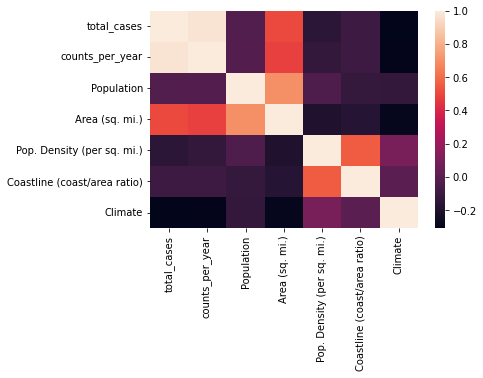

In [62]:
seaborn.heatmap(tb_merge.corr())

In [63]:
# calcular indicador ataques por habitantes
tb_merge['cases/population'] = tb_merge['total_cases'] / tb_merge['Population']
tb_merge.sort_values('cases/population', ascending=False)

,country,total_cases,counts_per_year,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Climate,cases/population
8,new caledonia,12,1.500000,new caledonia,OCEANIA,219246,19060,11.5,11.83,2.0,5.473304e-05
7,french polynesia,14,2.000000,french polynesia,OCEANIA,274578,4167,65.9,60.60,2.0,5.098733e-05
29,cayman islands,2,0.666667,cayman islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,2.0,4.401796e-05
18,seychelles,3,1.000000,seychelles,SUB-SAHARAN AFRICA,81541,455,179.2,107.91,2.0,3.679131e-05
2,reunion,23,2.875000,reunion,SUB-SAHARAN AFRICA,787584,2517,312.9,8.22,2.0,2.920323e-05
33,tonga,2,0.666667,tonga,OCEANIA,114689,748,153.3,56.02,2.0,1.743846e-05
53,aruba,1,1.000000,aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,2.0,1.390995e-05
37,guam,2,0.500000,guam,OCEANIA,171019,541,316.1,23.20,2.0,1.169461e-05
25,samoa,2,0.250000,samoa,OCEANIA,176908,2944,60.1,13.69,2.0,1.130531e-05
0,australia,223,24.777778,australia,OCEANIA,20264082,7686850,2.6,0.34,1.0,1.100469e-05


# Os países mais frios ou quentes experimentam crescimento diferentes no número de ataques ao ano?

Fonte: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [68]:
file = open('temperatures_by_country.csv', 'rb')
file_lines = file.readlines(10000)
for i in range(5):
    print(file_lines[i].decode('utf-8'))
file.close()

dt,AverageTemperature,AverageTemperatureUncertainty,Country

1743-11-01,4.3839999999999995,2.294,Åland

1743-12-01,,,Åland

1744-01-01,,,Åland

1744-02-01,,,Åland



In [69]:
tb_climate = pd.read_csv('temperatures_by_country.csv', sep = ',', decimal = '.', encoding = 'utf-8')
tb_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [74]:
tb_climate = tb_climate.dropna()
tb_climate

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [77]:
tb_climate_concat = tb_climate.groupby('Country').agg(
    average_temperature = pd.NamedAgg('AverageTemperature','mean'),
).sort_values('average_temperature', ascending=False).reset_index()
tb_climate_concat.head(50)

,Country,average_temperature
0,Djibouti,28.816603
1,Mali,28.441977
2,Burkina Faso,28.083507
3,Senegal,27.967375
4,Aruba,27.920390
5,United Arab Emirates,27.693995
6,Mauritania,27.620256
7,Gambia,27.538552
8,Niger,27.458973
9,Curaçao,27.353415


In [78]:
#Limpeza dos nomes de 'Country'
clean_country = list()
for element in tb_climate_concat['Country']:
    clean_country.append(element.lower().strip())

tb_climate_concat['country'] = clean_country
tb_climate_concat.head()

,Country,average_temperature,country
0,Djibouti,28.816603,djibouti
1,Mali,28.441977,mali
2,Burkina Faso,28.083507,burkina faso
3,Senegal,27.967375,senegal
4,Aruba,27.920390,aruba


In [79]:
tb_climate_summary = tb_climate_concat.drop('Country', axis=1)
tb_climate_summary

,average_temperature,country
0,28.816603,djibouti
1,28.441977,mali
2,28.083507,burkina faso
3,27.967375,senegal
4,27.920390,aruba
...,...,...
237,-5.216659,canada
238,-5.521882,russia
239,-7.448028,svalbard and jan mayen
240,-18.053051,denmark


In [86]:
# Merge entre as 3 tabelas
tb_merge2 = pd.merge(tb_merge,tb_climate_summary,left_on='country',right_on='country').dropna().drop(['Country','Region'], axis=1)
tb_merge2.head()

,country,total_cases,counts_per_year,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Climate,cases/population,average_temperature
0,australia,223,24.777778,20264082,7686850,2.6,0.34,1.0,1.100469e-05,21.624697
1,south africa,63,7.000000,44187637,1219912,36.2,0.23,1.0,1.425738e-06,17.270983
2,reunion,23,2.875000,787584,2517,312.9,8.22,2.0,2.920323e-05,23.301403
3,brazil,19,2.111111,188078227,8511965,22.1,0.09,2.0,1.010218e-07,24.699256
4,mexico,16,2.000000,107449525,1972550,54.5,0.47,1.5,1.489071e-07,20.567558


In [87]:
tb_merge2.corr()

,total_cases,counts_per_year,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Climate,cases/population,average_temperature
total_cases,1.000000,0.970234,-0.032815,0.500529,-0.187223,-0.099586,-0.310023,0.085343,-0.072979
counts_per_year,0.970234,1.000000,-0.025988,0.480315,-0.154922,-0.106168,-0.303821,0.050955,-0.059679
Population,-0.032815,-0.025988,1.000000,0.695934,-0.013773,-0.140197,-0.135255,-0.147689,-0.426216
Area (sq. mi.),0.500529,0.480315,0.695934,1.000000,-0.222175,-0.199112,-0.290737,-0.135033,-0.276450
Pop. Density (per sq. mi.),-0.187223,-0.154922,-0.013773,-0.222175,1.000000,0.086005,0.144518,-0.030145,0.048781
Coastline (coast/area ratio),-0.099586,-0.106168,-0.140197,-0.199112,0.086005,1.000000,0.016517,0.542722,0.270116
Climate,-0.310023,-0.303821,-0.135255,-0.290737,0.144518,0.016517,1.000000,-0.065779,-0.507842
cases/population,0.085343,0.050955,-0.147689,-0.135033,-0.030145,0.542722,-0.065779,1.000000,0.224491
average_temperature,-0.072979,-0.059679,-0.426216,-0.276450,0.048781,0.270116,-0.507842,0.224491,1.000000


<AxesSubplot:>

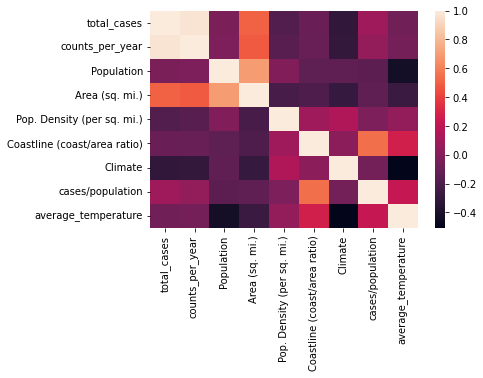

In [88]:
seaborn.heatmap(tb_merge2.corr())